---
# Анализ A/B-теста
---

## Импорт библиотек
___

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
warnings.simplefilter("ignore")
pd.set_option('display.max_colwidth', -1)

## Загрузка данных
___

In [2]:
hypothesis = pd.read_csv('hypothesis.csv')
orders = pd.read_csv('orders.csv')
visitors = pd.read_csv('visitors.csv')

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


---

In [4]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [5]:
orders['date'] = orders['date'].astype('datetime64')

In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [7]:
orders.duplicated().sum()

0

In [8]:
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

In [9]:
orders.describe()

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


---

In [10]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [11]:
visitors['date'] = visitors['date'].astype('datetime64')

In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [13]:
visitors.duplicated().sum()

0

In [14]:
visitors['group'].value_counts()

B    31
A    31
Name: group, dtype: int64

In [15]:
visitors.describe()

,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


---

Проблем в данных не нашел. Изменил тип данных даты. Дубликатов нет, аномальных групп не наблюдаю.
___

## Приоритизация гипотез
___

- Применить фреймворк `ICE` для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Применить фреймворк `RICE` для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Указать, как изменилась приоритизация гипотез при применении `RICE` вместо `ICE`. Объяснить, почему так произошло.

In [16]:
hypothesis['ICE'] = round(hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'])

In [17]:
hypothesis.sort_values('ICE', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.0


In [18]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

In [19]:
hypothesis.sort_values('RICE', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.0,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.0,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.0,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.0,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.0,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


---
Из-за того, что на RICE влияет охват, восьмая гипотеза с первого места опустилась на пятое, седьмая с третьего поднялась на первое, а вторая с пятого на второе. Посление четыре места все еще за первой, третьей, четвертой и пятой гипотезами.

Думаю, стоит ориентироваться на RICE, ведь он учитывает и охват.
___

## Анализ A/B-теста
___

- Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
- Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
- Построить график кумулятивной конверсии по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения.
- Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выберать границу для определения аномальных пользователей.
- Построить точечный график стоимостей заказов. Сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили стоимости заказов. Выберать границу для определения аномальных заказов.
- Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
- Принять решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.
___

### Построение графика кумулятивной выручки по группам
___

In [20]:
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [21]:
visitorsAggregated = datesGroups.apply(
lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [22]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [23]:
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


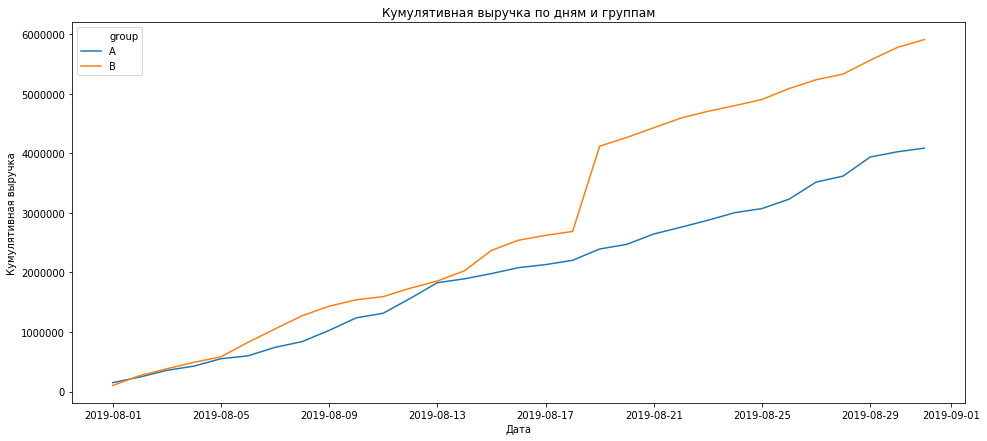

In [24]:
plt.figure(figsize=(16,7))
fig = sns.lineplot(data = cumulativeData, x= 'date', y = 'revenue', hue = 'group')

fig.set_title('Кумулятивная выручка по дням и группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка');

---
Видно, что рост у группы B быстрее, но в середине месяца участок, на который сильно повлияли выбросы
___

### Построение графика кумулятивного среднего чека по группам
___

In [25]:
cumulativeData['average_bill'] = cumulativeData['revenue']/cumulativeData['visitors']
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

In [26]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

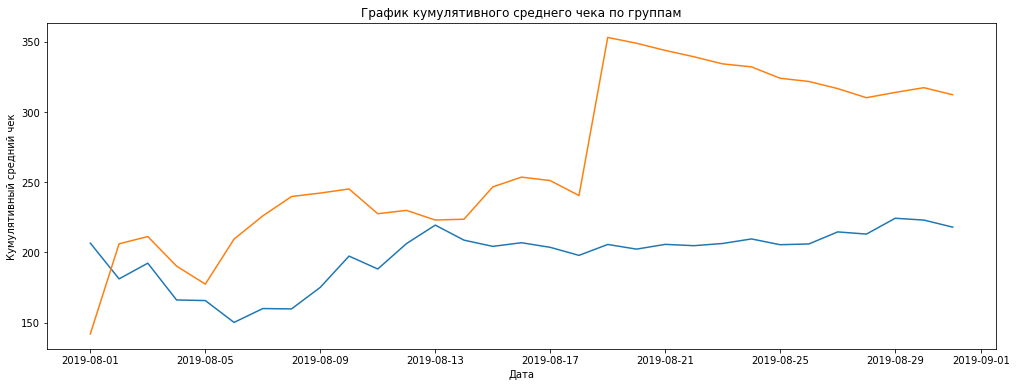

In [27]:
plt.figure(figsize=(17,6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['average_bill'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['average_bill'], label='B')

plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек');

---
Группа B и тут ведет, но выброс сильно портит картину
___

### Построение графика относительного изменения кумулятивного среднего чека группы B к группе A
___

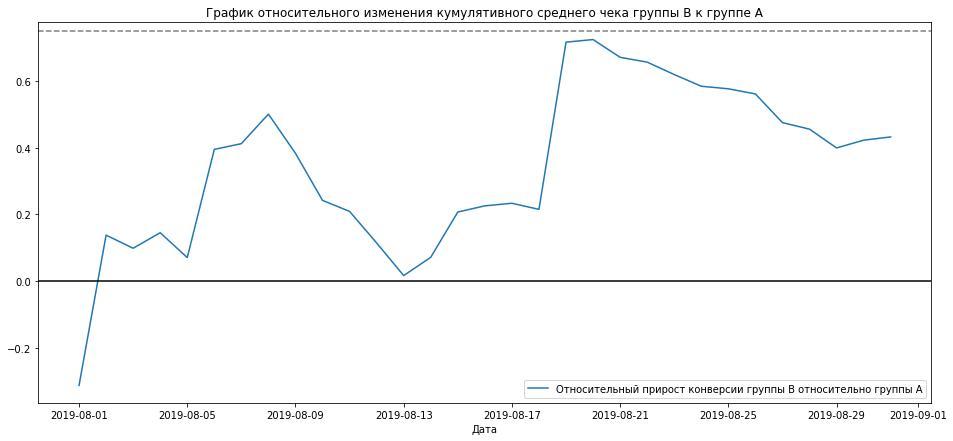

In [32]:
mergedCumulativeBill = cumulativeDataA[['date','average_bill']].merge(cumulativeDataB[['date','average_bill']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(16,7))

plt.plot(mergedCumulativeBill['date'], mergedCumulativeBill['average_billB']/mergedCumulativeBill['average_billA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.axhline(y=0, color='black', linestyle='-')
plt.axhline(y=0.75, color='grey', linestyle='--');

---
Группа B почти сразу начинает лидировать, есть спад с 8 по 18 числа, но после резко выходит вперед
___

### Построение графика кумулятивной конверсии по группам
___

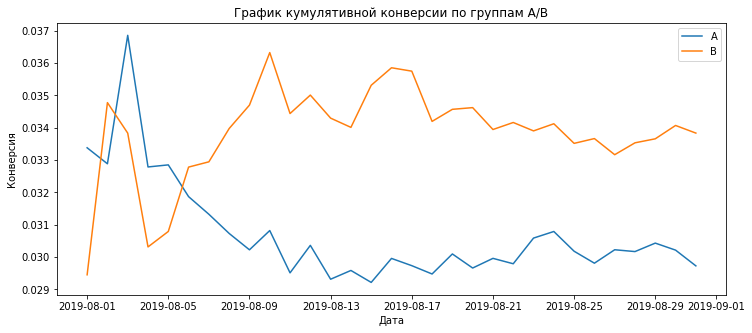

In [34]:
plt.figure(figsize=(12,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('График кумулятивной конверсии по группам A/B')
plt.xlabel('Дата')
plt.ylabel('Конверсия');

---
Наблюдаем преимущество группы B

Во второй половине теста показатели стабилизировались
___

### Построение графика относительного изменения кумулятивной конверсии группы B к группе A
___

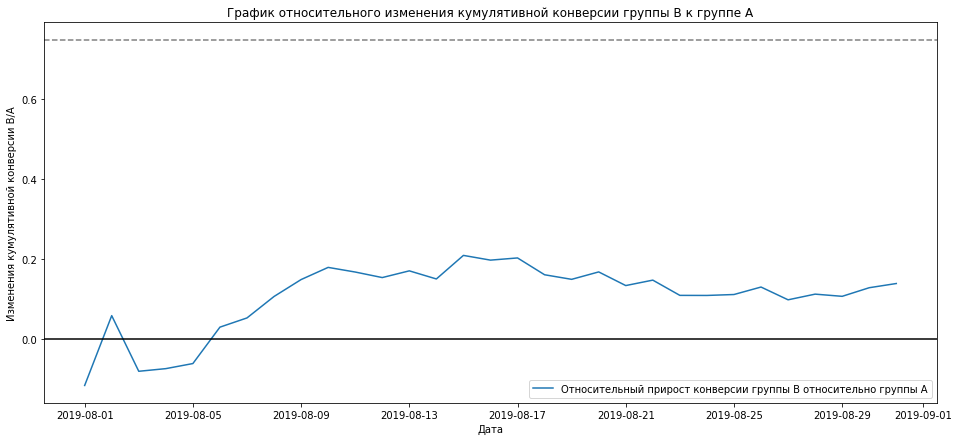

In [36]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(16,7))

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Изменения кумулятивной конверсии В/А')
plt.axhline(y=0, color='black', linestyle='-')
plt.axhline(y=0.75, color='grey', linestyle='--');

---
Конверсия в группе В стабильно лучше, чем в группе А
___

### Построение точечного графика количества заказов по пользователям
___

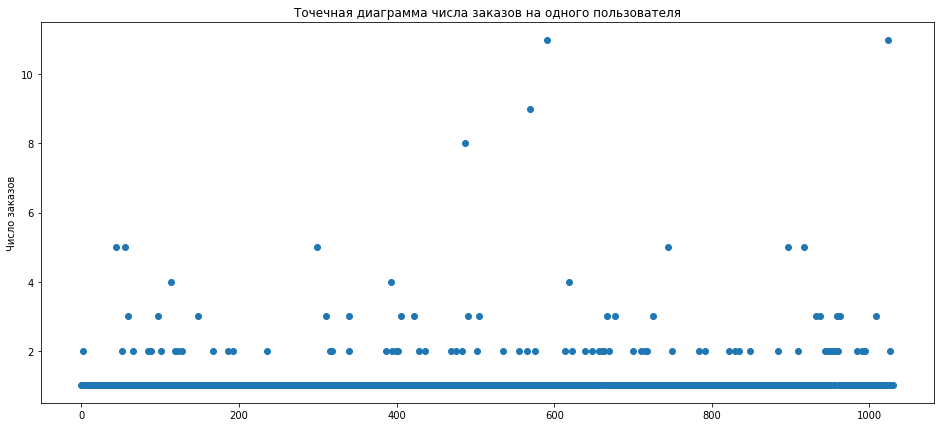

In [37]:
ordersByUsers = orders.groupby('visitorId', as_index=False).agg({'transactionId' : 'nunique'})
ordersByUsers.columns = ['visitorId','orders']


x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(16,7))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечная диаграмма числа заказов на одного пользователя')
plt.ylabel('Число заказов');

---
Большинство делает 1 заказ, мало у кого больше 3 заказов.
___

### 95-й и 99-й перцентили количества заказов на пользователя
___

In [38]:
print(np.percentile(ordersByUsers['orders'],[95,99]))

[2. 4.]


In [39]:
print(np.percentile(ordersByUsers['orders'],[75,95,96,97,98,99]))

[1. 2. 2. 2. 3. 4.]


---
90,8% пользователей делают один заказ, 6,2% делают 2 заказа. Аномальными можно считать пользователей с 3 и более заказами, ведь на них приходится всего 3%.
___

### Построение точечного графика стоимостей заказов
___

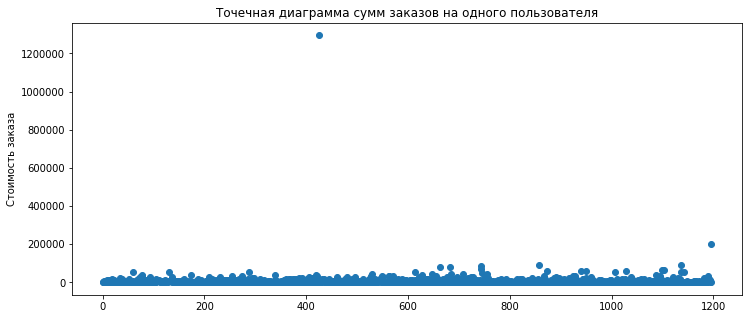

In [40]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(12,5))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечная диаграмма сумм заказов на одного пользователя')
plt.ylabel('Стоимость заказа');

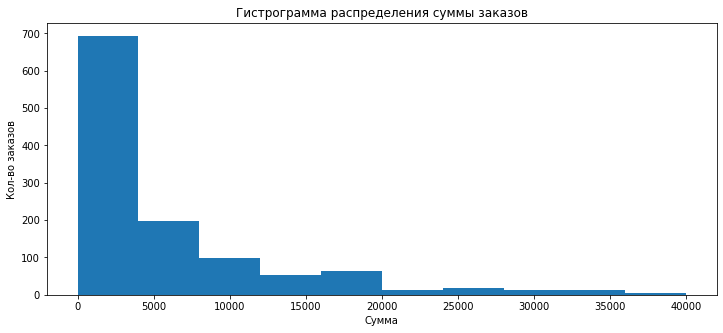

In [41]:
plt.figure(figsize=(12,5))
plt.hist(orders['revenue'], range=(0, 40000))
plt.title('Гистрограмма распределения суммы заказов')
plt.xlabel('Сумма')
plt.ylabel('Кол-во заказов');

---
Большинство сумм не превышает 10 тысяч, основная масса приходится на суммы до 4 тысяч.
___

### 95-й и 99-й перцентили стоимости заказов
___

In [42]:
print(np.percentile(orders['revenue'],[95,99]))

[28000.  58233.2]


In [43]:
print(np.percentile(orders['revenue'],[75,95,96,97,98,99]))

[ 8290.  28000.  31382.  35485.  44133.2 58233.2]


---
Менее 5% заказов на сумму больше 28 тысяч, менее 1% заказов стоимостью больше 58 тысяч. Считаю, что аномальной можно назвать стоимость от 30 тысяч.
___

### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным
___

---
Необходима проверка гипотезы о равенстве среднего двух генеральных совокупностей. Для выбора метода необходимо посмотреть на распределение.

Сформилируем нулевую гипотезу: H₀ — распределение нормально

Альтернативная гипотеза: H₁ — распределение не нормально

Уровень значимости α = 5%
___

In [44]:
alpha = .05

In [45]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg(
    {'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']


sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(
    visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)



results = stats.shapiro(sampleA)
p_value = results[1] 


print('p_value: ', p_value)

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p_value:  0.0
Отвергаем нулевую гипотезу


In [46]:
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg(
    {'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']


sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(
    visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)


results = stats.shapiro(sampleB)
p_value = results[1] 


print('p_value: ', p_value)

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p_value:  0.0
Отвергаем нулевую гипотезу


---
Сформилируем нулевую гипотезу: H₀ — конверсия группы А равна конверсии группы В

Альтернативная гипотеза: H₁ — конверсия группы А отличается от конверсии группы В

Уровень значимости α = 5%

Для проверки воспользуемся непараметрическим тестом Манна-Уитни, так как критерий Шапиро-Уилка показал, что выборки не распределены нормально
___

In [47]:
results = stats.mannwhitneyu(sampleA, sampleB)
p_value = results[1] 

print('p_value: {0:.4f}'.format(p_value))

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p_value: 0.0084
Отвергаем нулевую гипотезу


In [48]:
print('Конверсия в группе A равна: {0:.3f}\n'.format(sampleA.mean()))
print('Конверсия в группе В равна: {0:.3f}\n'.format(sampleB.mean()))
print('Относительный прирост конверсии группы B по отношению к группе A: {:.3f}'.format(sampleB.mean()/sampleA.mean()-1))

Конверсия в группе A равна: 0.030

Конверсия в группе В равна: 0.034

Относительный прирост конверсии группы B по отношению к группе A: 0.138


---
Относительный прирост конверсии группы B по отношению к группе A составляет 13,8%. Непараметрический тест Манна-Уитни показывает, что эта разница в конверсии между выборками является статистически значимой.

Конверсия в группе В равна 0.034, в то время как конверсия в группе A равна 0.030.
___

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным
___

---
Сформилируем нулевую гипотезу: H₀ — распределение нормально

Альтернативная гипотеза: H₁ — распределение не нормально

Уровень значимости α = 5%
___

In [49]:
results = stats.shapiro(orders[orders['group']=='A']['revenue'])
p_value = results[1] 

print('p_value: ', p_value)

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p_value:  1.739703399801917e-34
Отвергаем нулевую гипотезу


In [50]:
results = stats.shapiro(orders[orders['group']=='B']['revenue'])
p_value = results[1] 

print('p_value: ', p_value)

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p_value:  0.0
Отвергаем нулевую гипотезу


---
Сформилируем нулевую гипотезу: H₀ — средний чек пользователей группы А равен среднему чеку пользователей группы В

Альтернативная гипотеза: H₁ — средний чек пользователей группы А отличается от среднего чека пользователей группы В

Уровень значимости α = 5%

Для проверки воспользуемся непараметрическим тестом Манна-Уитни, так как критерий Шапиро-Уилка показал, что выборки не распределены нормально
___

In [51]:
results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
p_value = results[1] 

print('p_value: {0:.4f}'.format(p_value))

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p_value: 0.3646
Не получилось отвергнуть нулевую гипотезу


In [52]:
print('Средний чек в группе A: {:.0f}'.format(orders[orders['group']=='A']['revenue'].mean()))
print('Средний чек в группе B: {:.0f}'.format(orders[orders['group']=='B']['revenue'].mean()))

Средний чек в группе A: 7334
Средний чек в группе B: 9231


In [53]:
print('Средний чек в группе A: {:.0f}'.format(orders[orders['group']=='A']['revenue'].median()))
print('Средний чек в группе B: {:.0f}'.format(orders[orders['group']=='B']['revenue'].median()))

Средний чек в группе A: 3000
Средний чек в группе B: 2965


---
Непараметрический тест Манна-Уитни показывает, что средний чек пользователей группы А примерно равен среднему чеку пользователей группы В.

Хоть мы и наблюдаем явную разницу средних, тест говорит об обратном. Причина таких средних - выбросы, сравнение медиан это доказывает.
___

### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным
___

In [54]:
print(np.percentile(orders['revenue'],[1,2,3,4,3.4]))

[100.  129.2 190.  290.  250. ]


---
Проведем очистку данных. Отфильтруем по кочичеству покупок (строго меньше 3) и по сумме (меньше 30000 и больше 250, обе границы необходимы для влияния над выбросами, ведь только 3,4% пользователей делаю покупки на сумму до 250)
___

In [55]:
orders_filtered = orders[~orders.index.isin(ordersByUsers[ordersByUsers['orders'] > 2].index)]\
    .query('250 <= revenue <= 30000')

---
Сформилируем нулевую гипотезу: H₀ — распределение нормально

Альтернативная гипотеза: H₁ — распределение не нормально

Уровень значимости α = 5%
___

In [56]:
ordersByUsersA = orders_filtered[orders_filtered['group']=='A'].groupby('visitorId', as_index=False).agg(
    {'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']


sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(
    visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)



results = stats.shapiro(sampleA)
p_value = results[1] 


print('p_value: ', p_value)

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p_value:  0.0
Отвергаем нулевую гипотезу


In [57]:
ordersByUsersB = orders_filtered[orders_filtered['group']=='B'].groupby('visitorId', as_index=False).agg(
    {'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']


sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(
    visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)


results = stats.shapiro(sampleB)
p_value = results[1] 


print('p_value: ', p_value)

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p_value:  0.0
Отвергаем нулевую гипотезу


---
Сформилируем нулевую гипотезу: H₀ — по «очищенным» данным конверсия группы А равна конверсии группы В

Альтернативная гипотеза: H₁ — по «очищенным» данным конверсия группы А отличается от конверсии группы В

Уровень значимости α = 5%

Для проверки воспользуемся непараметрическим тестом Манна-Уитни, так как критерий Шапиро-Уилка показал, что выборки не распределены нормально
___

In [58]:
results = stats.mannwhitneyu(sampleA, sampleB)
p_value = results[1] 

print('p_value: {0:.4f}'.format(p_value))

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p_value: 0.0125
Отвергаем нулевую гипотезу


In [59]:
print('Конверсия в группе A равна: {0:.3f}\n'.format(sampleA.mean()))
print('Конверсия в группе В равна: {0:.3f}\n'.format(sampleB.mean()))
print('Относительный прирост конверсии группы B по отношению к группе A: {:.3f}'.format(sampleB.mean()/sampleA.mean()-1))

Конверсия в группе A равна: 0.027

Конверсия в группе В равна: 0.030

Относительный прирост конверсии группы B по отношению к группе A: 0.139


---
Относительный прирост конверсии группы B по отношению к группе A составляет 13,9%. Непараметрический тест Манна-Уитни показывает, что эта разница в конверсии между выборками является статистически значимой.

Конверсия в группе В равна 0.027, в то время как конверсия в группе A равна 0.030.
___

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным
___

---
Сформилируем нулевую гипотезу: H₀ — распределение нормально

Альтернативная гипотеза: H₁ — распределение не нормально

Уровень значимости α = 5%
___

In [60]:
results = stats.shapiro(orders_filtered[orders_filtered['group']=='A']['revenue'])
p_value = results[1] 

print('p_value: ', p_value)

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p_value:  4.135942012772334e-25
Отвергаем нулевую гипотезу


In [61]:
results = stats.shapiro(orders_filtered[orders_filtered['group']=='B']['revenue'])
p_value = results[1] 

print('p_value: ', p_value)

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p_value:  1.778245014019756e-27
Отвергаем нулевую гипотезу


---
Сформилируем нулевую гипотезу: H₀ — средний чек пользователей группы А равен среднему чеку пользователей группы В

Альтернативная гипотеза: H₁ — средний чек пользователей группы А отличается от среднего чека пользователей группы В

Уровень значимости α = 5%

Для проверки воспользуемся непараметрическим тестом Манна-Уитни, так как критерий Шапиро-Уилка показал, что выборки не распределены нормально
___

In [62]:
results = stats.mannwhitneyu(orders_filtered[orders_filtered['group']=='A']['revenue'], orders_filtered[orders_filtered['group']=='B']['revenue'])
p_value = results[1] 

print('p_value: {0:.4f}'.format(p_value))

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу:")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p_value: 0.4781
Не получилось отвергнуть нулевую гипотезу


In [63]:
print('Средний чек в группе A: {:.0f}'.format(orders_filtered[orders_filtered['group']=='A']['revenue'].mean()))
print('Средний чек в группе B: {:.0f}'.format(orders_filtered[orders_filtered['group']=='B']['revenue'].mean()))

Средний чек в группе A: 5508
Средний чек в группе B: 5385


In [64]:
print('Средний чек в группе A: {:.0f}'.format(orders_filtered[orders_filtered['group']=='A']['revenue'].median()))
print('Средний чек в группе B: {:.0f}'.format(orders_filtered[orders_filtered['group']=='B']['revenue'].median()))

Средний чек в группе A: 2986
Средний чек в группе B: 2950


---
Непараметрический тест Манна-Уитни показывает, что средний чек пользователей группы А примерно равен среднему чеку пользователей группы В.

Мы добились того, что разница средних совпадает, выбросы практически одинаково влияют на обе группы.
___

### Вывод
___

### Приоритизирование гипотез
Были рассмотрены гипотезы по увеличению выручки интернет-магазина в рамках фреймворков ICE и RICE. Думаю, стоит ориентироваться на RICE, ведь он учитывает и охват. Приоритет стоит отдать следующим гиппотезам(в скобках указан номер приоритета):
1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок(RICE = 1, ICE = 3)
1. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа(RICE = 2, ICE = 5)
1. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей(RICE = 3, ICE = 2)
1. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию(RICE = 4, ICE = 4)	


### Анализ А/В-теста
1. 90,8% пользователей делают один заказ, 6,2% делают 2 заказа.
1. Большинство заказов не превышает 10 тысяч, основная масса приходится на суммы до 4 тысяч.
1. Менее 5% заказов на сумму больше 28 тысяч, менее 1% заказов стоимостью больше 58 тысяч. 
1. На "сырых" дынных непараметрический тест Манна-Уитни показывает, что разница в конверсии между группами А и В является статистически значимой, а вот статистически значимого различия в средних чеках в группах A и B нет. Относительный прирост конверсии группы B по отношению к группе A составляет 13,8%.
1. На "очищенных" данных тест Манна-Уитни подтверждает результаты, полученные на "сырых" дынных, конверсии группы B по отношению к группе A составляет 13,9%.

### Рекомендации
1. Считаю, что тест можно завершить и отдать предпочтение правкам группы B, ведь графики стабилизировались, конверсия выше, а средний чек практически одинаков.
2. Срочно заняться выполнением гипотезы "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"